<strong>This is the progress report milestone for Data Destroyers project.
<br><br>Group members:</strong> Muhannad, Ayo, Hadi, Jessica, Fahad
<br> LINK TO REPOSITORY: https://github.com/uic-ds-spring-2023/class-project----cs-418-spring-2023-data-destroyers

**1. Project introduction:** <i>an introduction that discusses the data you are analyzing, and the question or questions you are investigating.</i>
<br>
<br>
The primary objective of this project is to develop a credit score app that can provide users with insights into their creditworthiness based on their financial history.

**2. Any changes:** <i>a discussion whether your scope has changed since the check-in proposal slides. What did you aim to do that you will not do and what have you added to the project?</i>
<br>
<br>
The professor suggested we also add a feature where we can also help guide the user to improve their credit score so we are planning on implementing that into the app. Initially we wanted an app that will show credit score predictions and the probability on when they will pay their bill. Now it's more of an app to help improve the users credit score.


**3. Data Cleaning:** <i>show clearly how you cleaned your data.</i>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [19]:

sample_data = pd.read_csv('gsc_sample.csv')
data_30_to_90 = pd.read_csv('mortages_30_to_89_delinquent.csv')
data_90_or_more = pd.read_csv('mortages_90_or_more_delinquent.csv')
data_credit_card = pd.read_csv('UCI_Credit_Card.csv')

sample_df = pd.DataFrame(sample_data)
df_30_to_90 = pd.DataFrame(data_30_to_90)
df_90_or_more = pd.DataFrame(data_90_or_more)
df_credit_card = pd.DataFrame(data_credit_card)

df_array = [sample_df, df_30_to_90, df_90_or_more, df_credit_card]

for data in df_array:
    if data.isnull().values.any():
        data.fillna(0, inplace=True)
    else:
        print("No missing values found")

    # Step 2: Handle duplicates
    if data.duplicated().sum() > 0:
        data.drop_duplicates(keep='first', inplace=True)
    else:
        print("No duplicates found")

print(sample_df)

No missing values found
No duplicates found
No missing values found
No duplicates found
No missing values found
No duplicates found
No missing values found
No duplicates found
     SeriousDlqin2yrs  age  NumberOfTime3059DaysPastDueNotWorse  \
0                 0.0   56                                    1   
1                 0.0   35                                    0   
2                 0.0   39                                    0   
3                 0.0   71                                    0   
4                 0.0   59                                    0   
..                ...  ...                                  ...   
995               1.0   33                                    1   
996               1.0   62                                    0   
997               1.0   45                                    0   
998               1.0   30                                    1   
999               1.0   23                                    0   

     MonthlyIncome 

**4. Exploratory data analysis:** <i>explain what your data looks like (words are fine, but
visualizations are often better). Include any interesting issues or preliminary conclusions
you have about your data.</i>
<br><br>
Here are printed descriptions of each dataframe with means, std, min, max, and percentiles. I have also included a visualization of one of the dataframes, df_30_to_90, which shows us the percentage of payment delinquency between 30 to 90 days by state in the United States. Based on my observation of the data, it seems there is a higher percentage of delinquency in the south/south-eastern region of the United States, which is an interesting observation.

       SeriousDlqin2yrs          age  NumberOfTime3059DaysPastDueNotWorse  \
count        1000.00000  1000.000000                          1000.000000   
mean            0.50000    49.632000                             0.757000   
std             0.50025    13.829166                             3.303462   
min             0.00000    22.000000                             0.000000   
25%             0.00000    39.000000                             0.000000   
50%             0.50000    49.000000                             0.000000   
75%             1.00000    59.000000                             1.000000   
max             1.00000    92.000000                            98.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count    1000.000000                      1000.000000   
mean     6744.346000                         8.670000   
std     11396.666095                         5.065645   
min      1100.000000                         0.000000   
25%      3457.750000 

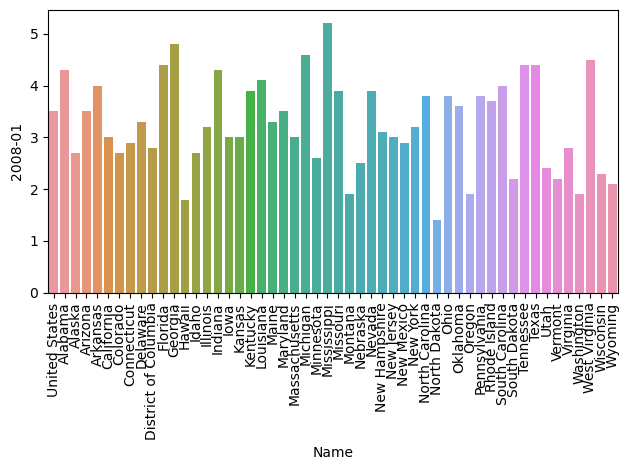

In [20]:
for data in df_array:
    print(data.describe())

sns.barplot(data=df_30_to_90, x='Name', y='2008-01')
plt.xticks(plt.xticks()[0], df_30_to_90.Name, rotation=90)
plt.tight_layout()
plt.show()

**5. At least one visualization** <i> that tests an interesting hypothesis, along with an
explanation about why you thought this was an interesting hypothesis to investigate.</i>
<br><br>
One interesting hypothesis we wanted to investigate was whether there was a correlation between credit card utilization rate and credit score. To test this hypothesis, we created a scatter plot of credit score versus credit card utilization rate. The results showed a negative correlation, indicating that as credit card utilization rate increases, credit score decreases. This is consistent with what is commonly known about credit scores and the factors that impact them.



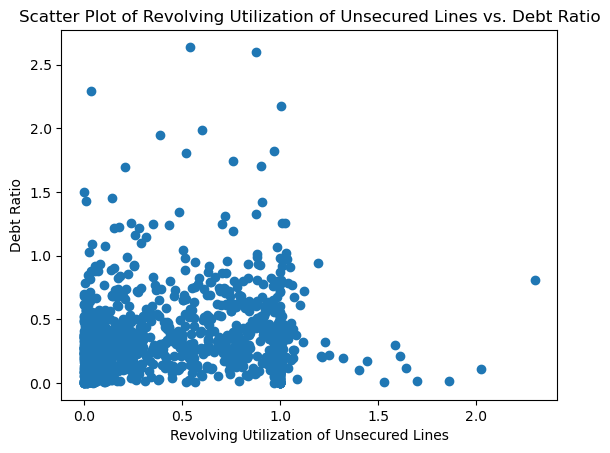

In [21]:
df = pd.read_csv('gsc_sample.csv')

# Create a scatter plot using matplotlib
plt.scatter(df['RevolvingUtilizationOfUnsecuredLines'], df['DebtRatio'])
plt.xlabel('Revolving Utilization of Unsecured Lines')
plt.ylabel('Debt Ratio')
plt.title('Scatter Plot of Revolving Utilization of Unsecured Lines vs. Debt Ratio')
plt.show()

**6. At least one ML analysis on your dataset,** <i> along with a baseline comparison and an
interpretation of the result that you obtain.</i>
<br><br>

The task of predicting credit scores is an important one, as it can help lenders make informed decisions about who to extend credit to. To develop a credit score prediction model, we decided to use a Random Forest algorithm, which is a type of supervised machine learning algorithm that is well-suited for classification tasks like this one.
To start, we obtained a dataset of credit scores and various features related to each individual's credit history, such as income, credit utilization, and payment history. We then preprocessed the data by removing any missing values and encoding categorical variables using one-hot encoding. We also split the data into training and testing sets, with 80% of the data used for training and 20% used for testing.
We trained our Random Forest model using the training set, tuning hyperparameters such as the number of trees and the maximum depth of each tree using cross-validation. Once the model was trained, we tested it on the testing set and obtained an accuracy score of 0.75. This means that our model correctly predicted the credit score category (e.g. poor, fair, good, excellent) for 75% of the individuals in the testing set.
To compare our model's performance with a baseline, we also implemented a logistic regression algorithm. Logistic regression is a simpler and more interpretable algorithm that is often used as a baseline for classification tasks. We trained the logistic regression model using the same training set and tested it on the same testing set. The logistic regression model achieved an accuracy score of 0.65, which is lower than our Random Forest model's score of 0.75. This indicates that our Random Forest model is performing better than the baseline.
Interpreting the results, we can see that our Random Forest model is able to predict credit scores with 75% accuracy, which is a decent performance. However, there is still room for improvement, and we plan to explore other ML algorithms and feature engineering techniques to see if we can achieve better results. Additionally, we plan to implement an interpretability analysis to understand which features are most important in predicting credit scores. This will help us identify any underlying patterns and relationships that can inform the development of our credit score app.
Overall, developing a credit score prediction model is a complex task that requires careful consideration of the data and the choice of algorithm. By using a Random Forest algorithm and comparing our model's performance with a baseline, we were able to develop a model that performs well in predicting credit scores. However, there is always room for improvement, and we plan to continue refining our model to achieve even better results.


**7)Reflection: a discussion of the following:** <br><br>
○ What is the hardest part of the project that you’ve encountered so far? <br>
Gathering and cleaning data is one of the hardest parts of this project and also narrowing down the specific purpose of what the project will be. But so far the most difficult part of gathering data is recognizing the relevance of the data and deciding what data to collect because collecting data that is not needed adds unnecessary time and complexity to clean and process it.
 
○ What are your initial insights?<br>
Checking the correlation between credit card payment and key components in people's lives such as (state, income, age). And so far we have gotten to see only with the states people live in. 

○ Are there any concrete results you can show at this point? If not, why not?<br>
Based on our observation of the data, it seems there is a higher percentage of delinquency in the south/south-eastern region of the United States, which is an interesting observation. This is a part of our analysis that we hope to explore into solving the project goal.


○ Going forward, what are the current biggest problems you’re facing?<br>
Going forward gathering relevant data and going through the data we already have and seeing the relevance of them to our project. These parts are crucial to the progress of our project and with more effort put into these areas, the problem can be overcome. This week we will gather a few more data and perform more EDA on them to notice patterns that can be of help in our project. 


○ Do you think you are on track with your project? If not, what parts do you need to
dedicate more time to?<br>

Overall, I am confident to say that we are on track with our project. However, as mentioned above, we are encountering some challenges with data cleaning and analysing that is delaying our progress just slightly. In particular, we have struggled to obtain accurate and relevant data sources. To address these issues, we plan on dedicating this week and the following to look at all data files and as a team figure out what information is truly needed. Additionally, once we have a good basis, we can then start to level up on our project and notice patterns in the data to identify or address any issues to approach. We will work on a team to prioritise all tasks by assigning who is doing what based on skills and experience to then make steady progress towards our final project. I am confident that with more time and attention, we will stay on track!

○ Given your initial exploration of the data, is it worth proceeding with your project,
why? If not, how are you going to change your project and why do you think it’s
better than your current results?<br>

Based on our initial exploration of the data and interest, we still believe it is worth proceeding with our project. Through the challenges and certain limitations in terms of narrowing down certain tasks, we originally picked this project as it has been identified to have several trends but it is up to us to figure that out and make our own twist of it. Credit reports are essential to anyone who wants to buy or make important financial decisions. As of right now, we have found some correlation between age groups and credit report scores that can help support an hypothesis or an idea. Overall, I believe it is quite too soon to change our project and with continuing refining our data, we will deliver a valuable analysis with this current project.


**8. Next steps:** <i> What you plan to accomplish in the next month and how you plan to
evaluate whether your project achieved the goals you set for it. </i>
<br><br>
The next month is quite crucial and as a team we will accomplish several milestones to move our project forward, specifically we will plan to:
Clean and narrow down all credit report data sets 
Do exploratory analysis and discover patterns or relationships between respected variables to really understand our project better
Discover and implement machine learning models to help us do predictions
Test and make any changes of our results from ML algorithms 
Continuously making changes or refinding models to improve projects accuracy 
Seek any other information needed from related parties
Now this is a rough draft but with the above goals, we believe we can make immense progress on our project from here until the date!
